In [4]:
import os
if "models" not in os.listdir("."):
    os.chdir("../..")

In [33]:
import json

results = []

for i in range(4):
    with open(f"task_pair_metrics_fixed_zero_fixed_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])


for i in range(4):
    with open(f"task_pairs_extra/task_pair_metrics_fixed_zero_fixed_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

In [34]:
first_task = "antonyms"

task_results = [result for result in results if result["task_pair"][0] == first_task]

len(task_results)

44

In [35]:
from sprint.task_vector_utils import load_tasks, ICLRunner

# Load tasks
tasks = load_tasks()

fatal: destination path 'data/itv' already exists and is not an empty directory.


In [36]:
task_names = list(tasks.keys())

In [37]:
result_dict = {tuple(x["task_pair"]):x for x in results}

In [38]:
faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]



In [39]:
for second_task in task_names:
    try:
        orig_metric = result_dict[(second_task, second_task)]["orig_metric"]
        zero_metric = result_dict[(second_task, second_task)]["zero_metric"]

        print(
            f"{second_task}: orig_metric: {orig_metric}, zero_metric: {zero_metric}"
        )
    except KeyError:
        print(f"No results for {second_task}")

location_continent: orig_metric: -1.8046875, zero_metric: -11.625
football_player_position: orig_metric: -4.8125, zero_metric: -13.0625
location_religion: orig_metric: -1.3828125, zero_metric: -9.125
location_language: orig_metric: -1.71875, zero_metric: -9.75
person_profession: orig_metric: -5.84375, zero_metric: -13.75
location_country: orig_metric: -4.96875, zero_metric: -11.1875
country_capital: orig_metric: -2.15625, zero_metric: -11.8125
person_language: orig_metric: -1.9453125, zero_metric: -9.0
singular_plural: orig_metric: -1.125, zero_metric: -10.0625
present_simple_past_simple: orig_metric: -0.75390625, zero_metric: -6.03125
antonyms: orig_metric: -1.28125, zero_metric: -6.90625
plural_singular: orig_metric: -1.3359375, zero_metric: -8.0625
present_simple_past_perfect: orig_metric: -2.453125, zero_metric: -7.625
present_simple_gerund: orig_metric: -0.71484375, zero_metric: -9.9375
en_it: orig_metric: -3.3125, zero_metric: -19.5
it_en: orig_metric: -4.03125, zero_metric: -12.

In [43]:
import plotly.express as px
import numpy as np

first_task = "es_en"

faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]

correct_metrics = {}

for task in task_names:
    orig_metric = result_dict[(task, task)]["orig_metric"]
    zero_metric = result_dict[(task, task)]["zero_metric"]

    correct_metrics[task] = (orig_metric, zero_metric)


fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)

for second_task in task_names:
    if second_task in "person_profession":
        continue
    faithfulness_second = result_dict[(first_task, second_task)]["faithfullness"]
    n_nodes_second = result_dict[(first_task, second_task)]["n_nodes_counts"]

    orig_metric_second = result_dict[(first_task, second_task)]["orig_metric"]
    zero_metric_second = result_dict[(first_task, second_task)]["zero_metric"]

    faithfulness_second = np.array(faithfulness_second)
    faithfulness_second = faithfulness_second * (orig_metric_second - zero_metric_second) + zero_metric_second
    cm = correct_metrics[second_task]

    faithfulness_second = (faithfulness_second - cm[1]) / (cm[0] - cm[1])


    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Number of nodes")
fig.update_yaxes(title="Faithfullness")

fig


In [13]:
import plotly.express as px

# first_task = "location_continent"

# faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
# n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]


fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)

for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(second_task, second_task)]["faithfullness"]
    n_nodes_second = result_dict[(second_task, second_task)]["n_nodes_counts"]
    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Number of nodes")
fig.update_yaxes(title="Faithfullness")

fig


In [14]:
import plotly.express as px
import plotly

# first_task = "location_continent"

# faithfulness_task = result_dict[(first_task, first_task)]["faithfullness"]
# n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]


fig = px.line(x=[None], y = [None])

for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(second_task, second_task)]["faithfullness"]
    thresholds = result_dict[(second_task, second_task)]["thresholds"]
    fig.add_scatter(x=thresholds, y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

fig.update_xaxes(title="Threshold")
fig.update_yaxes(title="Faithfullness")
fig.update_layout(xaxis_type="log")

fig


In [47]:
import numpy as np 

# task_names = [x for x in task_names if x not in ["person_profession", "football_player_position", "location_continent"]]
heatmap_data = np.zeros((len(task_names), len(task_names)))

correct_metrics = {}

for task in task_names:
    orig_metric = result_dict[(task, task)]["orig_metric"]
    zero_metric = result_dict[(task, task)]["zero_metric"]

    correct_metrics[task] = (orig_metric, zero_metric)


for i, first_task in enumerate(task_names):
    _faith = result_dict[(first_task, first_task)]["faithfullness"]
    print(
        first_task, max(_faith), min(_faith), _faith
    )
    idx = [i for i, x in enumerate(_faith) if x > 0.5][0]
    for j, second_task in enumerate(task_names):
        if first_task == second_task:
            faith = _faith
        else:
            faith = result_dict[(first_task, second_task)]["faithfullness"]

        orig_metric_second = result_dict[(first_task, second_task)]["orig_metric"]
        zero_metric_second = result_dict[(first_task, second_task)]["zero_metric"]

        faith = np.array(faith)
        faith = faith * (orig_metric_second - zero_metric_second) + zero_metric_second
        cm = correct_metrics[second_task]


        faith = (faith - cm[1]) / (cm[0] - cm[1])

        heatmap_data[i, j] = faith[idx]

heatmap_data = np.flip(heatmap_data, axis=0)

zmin = (heatmap_data - 1).min()

fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="RdBu", width=800,  height=600, 
                labels=dict(x="Tested task", y="Ablated task", color="Faithfullness change"), zmin=zmin, zmax=abs(zmin)) 

fig.update_layout(width =400, height=300, 
                font_family="Serif", font_size=7, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5)

# import plotly.io as pio

# pio.kaleido.scope.mathjax = None
# pio.write_image(fig, "micrlhf-progress/images/circuit-ablation-new.pdf", width =400, height=300)
# pio.write_image(fig, "micrlhf-progress/images/circuit-ablation-new.pdf", width =400, height=300)

fig

location_continent 1.0 0.13365155131264916 [0.14001591089896578, 0.14001591089896578, 0.13365155131264916, 0.14638027048528243, 0.14638027048528243, 0.15274463007159905, 0.14638027048528243, 0.14638027048528243, 0.15274463007159905, 0.14638027048528243, 0.15910898965791567, 0.1654733492442323, 0.1718377088305489, 0.1718377088305489, 0.1718377088305489, 0.1654733492442323, 0.1654733492442323, 0.1654733492442323, 0.15910898965791567, 0.15910898965791567, 0.1718377088305489, 0.17820206841686556, 0.1909307875894988, 0.19729514717581542, 0.19729514717581542, 0.20365950676213207, 0.1909307875894988, 0.20365950676213207, 0.19729514717581542, 0.1909307875894988, 0.1909307875894988, 0.1909307875894988, 0.19729514717581542, 0.19729514717581542, 0.20365950676213207, 0.2100238663484487, 0.2163882259347653, 0.2163882259347653, 0.2163882259347653, 0.22275258552108193, 0.22275258552108193, 0.2163882259347653, 0.22275258552108193, 0.22275258552108193, 0.22911694510739858, 0.22911694510739858, 0.229116

: 

location_continent -3.1831831831831834 -3.159159159159159
football_player_position -4.037037037037037 -3.962962962962963
location_religion -1.2484599589322383 -1.2320328542094456
location_language -0.7189542483660131 -0.7058823529411765
person_profession -8.689655172413794 -8.620689655172415
location_country -2.2337662337662336 -2.2337662337662336
country_capital -0.4928909952606635 -0.4834123222748815
person_language -1.8837920489296636 -1.8837920489296636
singular_plural -0.6497175141242938 -0.6384180790960452
present_simple_past_simple 0.18862121988723732 0.20502306509482318
antonyms -0.2411764705882353 -0.23529411764705882
plural_singular -0.45088566827697263 -0.43800322061191627
present_simple_past_perfect 0.10899182561307902 0.11444141689373297
present_simple_gerund -0.3472140762463343 -0.3378299120234604
en_it -0.29081632653061223 -0.28061224489795916
it_en -3.864406779661017 -3.7966101694915255
en_fr -0.48484848484848486 -0.48484848484848486
en_es -0.22995461422087746 -0.223903

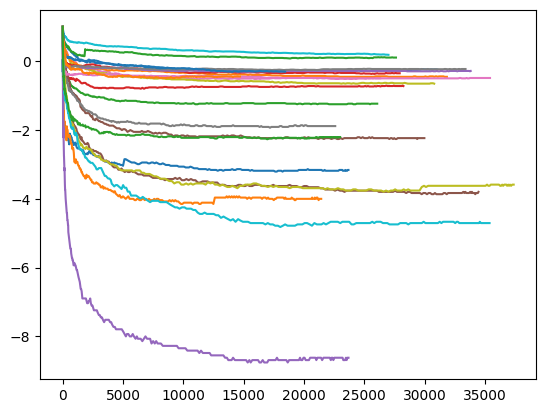

In [15]:
import matplotlib.pyplot as plt

plot_data = []

for i, first_task in enumerate(task_names):
    _faith = result_dict[(first_task, first_task)]["faithfullness"]
    n_nodes_task = result_dict[(first_task, first_task)]["n_nodes_counts"]

    print(first_task, min(_faith[:10]), max(_faith[:10]))

    plt.plot([max(n_nodes_task) - x for x in n_nodes_task]  , _faith, label=first_task)

plt.show()

In [55]:
import json

cleanup_results = []

with open("cleanup_results_final.jsonl") as f:
    lines = f.readlines()
    cleanup_results.extend([json.loads(line) for line in lines])

[x for x in cleanup_results if x["task"] == "person_profession" and x["layer"] == 12][0]["tv_loss"]

6.03125

: 

In [49]:
import json
import plotly.express as px

results = []

for i in range(4):
    with open(f"task_faithfulness_metrics_new_thinner_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

for i in range(4):
    with open(f"faith_extra/task_faithfulness_metrics_new_thinner_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

print(len(results))


inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if not x["inverse"]]
# non_inverse_results = {x["task"]: x for x in non_inverse_results}

# inverse_results = non_inverse_results

import matplotlib.pyplot as plt

plot_data = []

fig = px.line(x=[None], y = [None])

from collections import defaultdict

c = defaultdict(int)

for i, first_task in enumerate(task_names):
    # if first_task in ["present_simple_gerund", "football_player_position"]:
    #     continue
    task_name = inverse_results[i]["task"]
    if "actor" in str(task_name)[:40]:
        continue
    if "linebacker" in str(task_name)[:40]:
        continue
    if "Antarctica" in str(task_name)[:40]:
        continue

    _faith = inverse_results[i]["faithfullness"]
    _ths = inverse_results[i]["thresholds"]
    n_nodes_task = inverse_results[i]["n_nodes_counts"]

    c[str(task_name)[:40]] = c[str(task_name)[:40]] + 1

    # if first_task == "present_simple_gerund":
    #     print(_faith, _ths)
    #     print(
            
    #     )
    #     1/0
    fig.add_scatter(x=[max(n_nodes_task) -x for x in n_nodes_task], y=_faith, name=str(task_name)[:40])
    # fig.add_scatter(x=n_nodes_task, y=_faith, name=str(task_name)[:40])
    # fig.add_scatter(x=_ths, y=_faith, name=first_task)

    # plot_data.append((_faith, [max(n_nodes_task) - x for x in n_nodes_task]))

    # print(first_task, min(_faith[:100]), max(_faith[:10]))

    # plt.plot(n_nodes_task  , _faith, label=first_task)

print(c)

# fig.update_layout(xaxis_type="log")

# def interpolate(x, y, x_new):

#     max_x = max(x)
#     max_x_new = max(x_new)

#     print(y[-10:])

#     if max_x_new > max_x:
#         x = x + [max_x_new]
#         y = y + [y[0]]

#     from scipy.interpolate import interp1d
#     f = interp1d(x, y)
#     return f(x_new)

# #average across all tasks

# n_nodes = []
# for faith, n_nodes_task in plot_data:
#     n_nodes.extend(n_nodes_task)

# n_nodes = sorted(list(set(n_nodes)))

# # faith = np.zeros(len(n_nodes))


# new_faiths = []

# for faith, n_nodes_task in plot_data:
#     faith = interpolate(n_nodes_task, faith, n_nodes)
    
#     new_faiths.append(faith)

# faith = np.mean(new_faiths, axis=0)

# n_nodes = np.array(n_nodes)

# # fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="RdBu", width=800,  height=600, 
# #                 labels=dict(x="Tested task", y="Ablated task", color="Faithfullness"))

# fig = px.line(x=n_nodes[n_nodes < 5000], y=faith[n_nodes < 5000], labels=dict(x="Number of nodes", y="Faithfullness"))

# fig.update_layout(width =400, height=300, 
#                 font_family="Serif", font_size=12, 
#                 margin_l=5, margin_t=5, margin_b=5, margin_r=5)

# import plotly.io as pio
# pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =400, height=300)

fig

46
defaultdict(<class 'int'>, {"{'addendum': 'addenda', 'aircraft': 'air": 1, "{'Galata': 'Istanbul', 'Oliver Ames High": 1, "{'acknowledge': 'acknowledged', 'ache': ": 1, "{'Edwin of Northumbria': 'Christian', 'J": 1, "{'Al Madinah Region': 'Medina', 'Democra": 1, "{'high': 'low', 'big': 'small', 'deep': ": 1, "{'Northwest Territories': 'English', 'Ny": 1, "{'Gilad Atzmon': 'Hebrew', 'Emilio Lussu": 1, "{'addenda': 'addendum', 'aircraft': 'air": 1, "{'awake': 'awoken', 'be': 'been', 'bear'": 1, "{'en': 'fr', 'the': 'la', 'be': 'être', ": 1, "{'campaign, two, low, nature': 'nature',": 1, "{'acknowledge': 'acknowledging', 'ache':": 1, "{'be': 'ser', 'and': 'y', 'a': 'a', 'of'": 1, "{'natural, big, congress, difference': '": 1, "{'be': 'essere', 'and': 'e', 'i': 'io', ": 1, "{'fr': 'en', 'être': 'be', 'une': 'a', '": 1, "{'interesting, version, of, internationa": 1, "{'it': 'en', 'essere': 'be', 'un': 'a', ": 1, "{'es': 'en', 'ser': 'be', 'i': 'i', 'eso": 1})


In [3]:
import json
import plotly.express as px
import numpy as np

results = []

for i in range(4):
    with open(f"task_faithfulness_metrics_new_wide_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

for i in range(4):
    with open(f"task_faithfulness_metrics_new_wide_{i}.jsonl") as f:
        lines = f.readlines()
        results.extend([json.loads(line) for line in lines])

print(len(results))


inverse_results = [x for x in results if x["inverse"]]

# print(inverse_results[0])



# inverse_results = {x["task"]: x for x in inverse_results}
non_inverse_results = [x for x in results if not x["inverse"]]
# non_inverse_results = {x["task"]: x for x in non_inverse_results}

import matplotlib.pyplot as plt

plot_data = []

fig = px.line(x=[None], y = [None])

for i, first_task in enumerate(task_names):
    if first_task in ["fr_en", "country_capital"]:
        continue
    _faith = non_inverse_results[i]["faithfullness"]
    _ths = non_inverse_results[i]["thresholds"]
    n_nodes_task = non_inverse_results[i]["n_nodes_counts"]

    # fig.add_scatter(x=n_nodes_task, y=_faith, name=first_task)

    plot_data.append((_faith, n_nodes_task))

    # print(first_task, min(_faith[:100]), max(_faith[:10]))

    # plt.plot(n_nodes_task  , _faith, label=first_task)

# fig.update_layout(xaxis_type="log")

def interpolate(x, y, x_new):

    max_x = max(x)
    max_x_new = max(x_new)

    print(y[-10:])

    if max_x_new > max_x:
        x = x + [max_x_new]
        y = y + [y[0]]

    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    return f(x_new)

#average across all tasks

n_nodes = []
for faith, n_nodes_task in plot_data:
    n_nodes.extend(n_nodes_task)

n_nodes = sorted(list(set(n_nodes)))

# # faith = np.zeros(len(n_nodes))


new_faiths = []

for faith, n_nodes_task in plot_data:
    faith = interpolate(n_nodes_task, faith, n_nodes)
    
    new_faiths.append(faith)

faith = np.mean(new_faiths, axis=0)

n_nodes = np.array(n_nodes)


fig = px.line(x=n_nodes[n_nodes < 5000], y=faith[n_nodes < 5000], labels=dict(x="Number of nodes", y="Faithfullness"))

# fig.update_layout(width =400, height=300, 
#                 font_family="Serif", font_size=12, 
#                 margin_l=5, margin_t=5, margin_b=5, margin_r=5)

# import plotly.io as pio
# pio.write_image(fig, "micrlhf-progress/images/faith-nodes-inverse.pdf", width =400, height=300)

fig

48


NameError: name 'task_names' is not defined

In [20]:
fig = px.line(x=[max(n_nodes_task) - x for x in n_nodes_task], y=faithfulness_task)


plot_data = []


for second_task in task_names:
    # if second_task == "person_profession":
    #     continue
    faithfulness_second = result_dict[(second_task, second_task)]["faithfullness"]
    n_nodes_second = result_dict[(second_task, second_task)]["n_nodes_counts"]
    fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second, name=second_task)

# fig.add_scatter(x=[max(n_nodes_second) - x for x in n_nodes_second], y=faithfulness_second)

# fig.update_xaxes(title="Number of nodes")
# fig.update_yaxes(title="Faithfullness")


# fig.update_layout(xaxis_type="log")
    plot_data.append((_faith, [max(n_nodes_task) - x for x in n_nodes_task]))


def interpolate(x, y, x_new):

    max_x = max(x)
    max_x_new = max(x_new)

    print(y[-10:])

    if max_x_new > max_x:
        x = x + [max_x_new]
        y = y + [y[0]]

    from scipy.interpolate import interp1d
    f = interp1d(x, y)
    return f(x_new)

#average across all tasks

n_nodes = []
for faith, n_nodes_task in plot_data:
    n_nodes.extend(n_nodes_task)

n_nodes = sorted(list(set(n_nodes)))

# faith = np.zeros(len(n_nodes))


new_faiths = []

for faith, n_nodes_task in plot_data:
    faith = interpolate(n_nodes_task, faith, n_nodes)
    
    new_faiths.append(faith)

faith = np.mean(new_faiths, axis=0)

n_nodes = np.array(n_nodes)

# fig = px.imshow(heatmap_data - 1, x=task_names, y=task_names[::-1], color_continuous_scale="RdBu", width=800,  height=600, 
#                 labels=dict(x="Tested task", y="Ablated task", color="Faithfullness"))

fig = px.line(x=n_nodes[n_nodes < 5000], y=faith[n_nodes < 5000], labels=dict(x="Number of nodes", y="Faithfullness"))

fig.update_layout(width =400, height=300, 
                font_family="Serif", font_size=12, 
                margin_l=5, margin_t=5, margin_b=5, margin_r=5)

fig

[1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294]
[1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294]
[1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294]
[1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294]
[1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111294, 1.0016366612111